<a href="https://colab.research.google.com/github/Anirudh-red11/fcc-MagicTelescope/blob/main/fcc_MAGIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #converted
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier #for KNN
from sklearn.metrics import classification_report #we can print out the classification report;

In [3]:
df=pd.read_csv("telescope_data.csv",index_col=0)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [4]:
df.shape

(19020, 11)

In [5]:
cols=np.array(df.columns)
print(cols)
cols.shape

['fLength' 'fWidth' 'fSize' 'fConc' 'fConc1' 'fAsym' 'fM3Long' 'fM3Trans'
 'fAlpha' 'fDist' 'class']


(11,)

In [6]:
df["class"].unique()

array(['g', 'h'], dtype=object)

Computer cant understand text so lets take g=0 and h=1

In [7]:
df["class"]=(df["class"]=='g').astype(int)
#if the elemnt is g the it true and it converts it into true i.e sets 1.
#you can also manually change...

In [8]:
df["class"].unique()

array([1, 0])

In [9]:
df.iloc[1]

fLength      31.6036
fWidth       11.7235
fSize         2.5185
fConc         0.5303
fConc1        0.3773
fAsym        26.2722
fM3Long      23.8238
fM3Trans     -9.9574
fAlpha        6.3609
fDist       205.2610
class         1.0000
Name: 1, dtype: float64

In [10]:
 df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

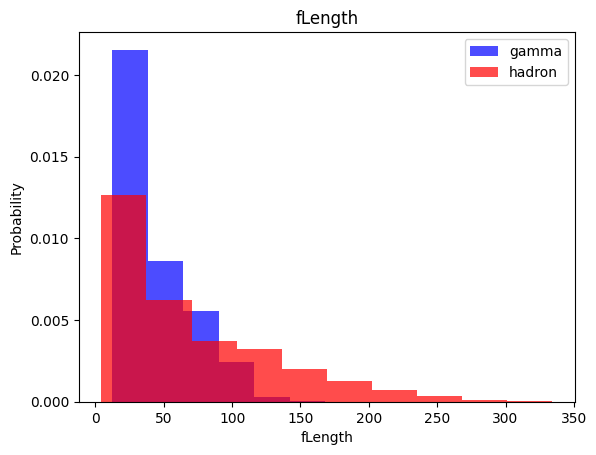

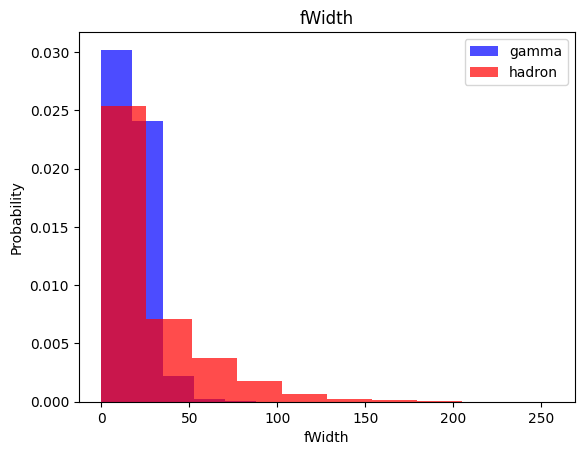

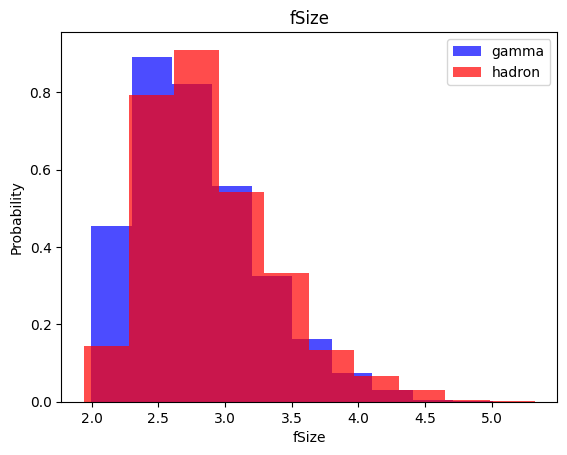

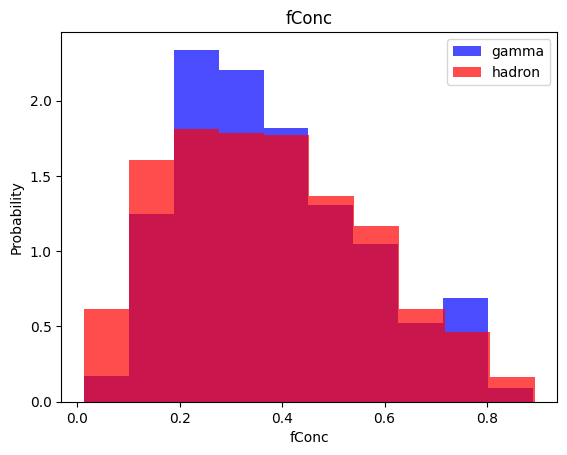

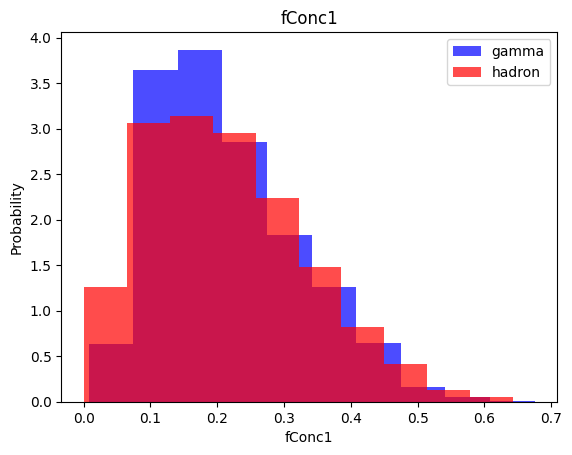

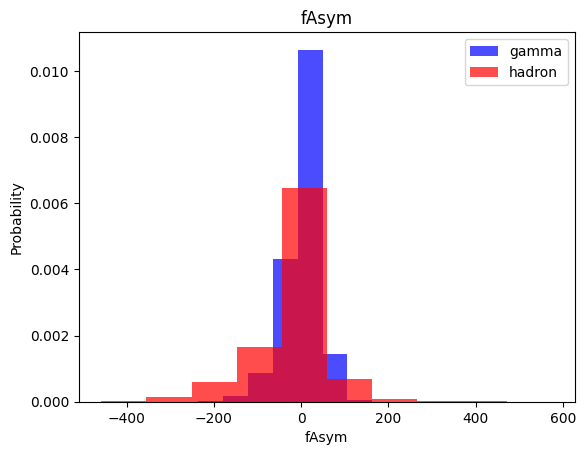

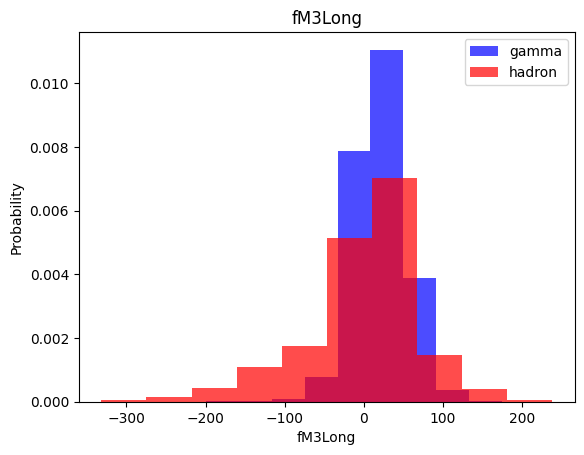

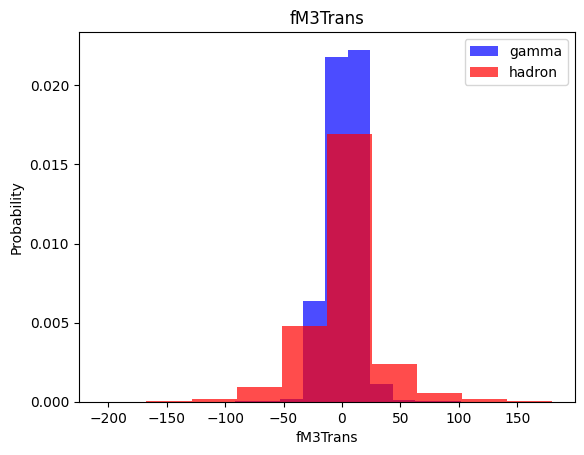

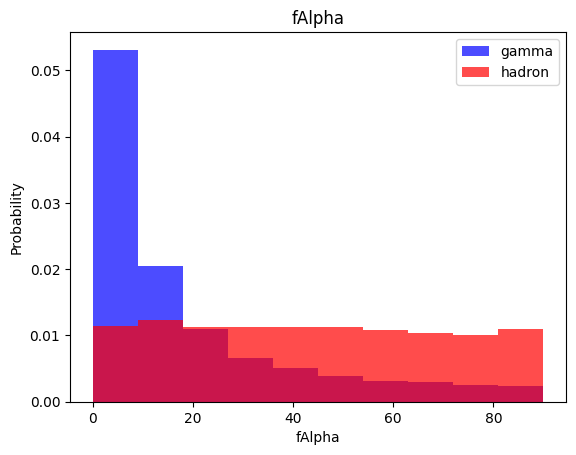

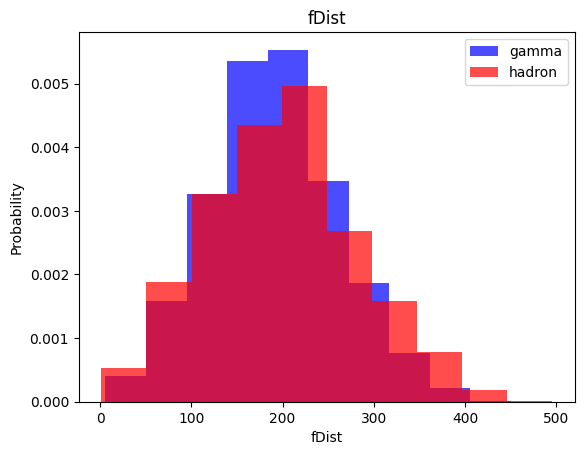

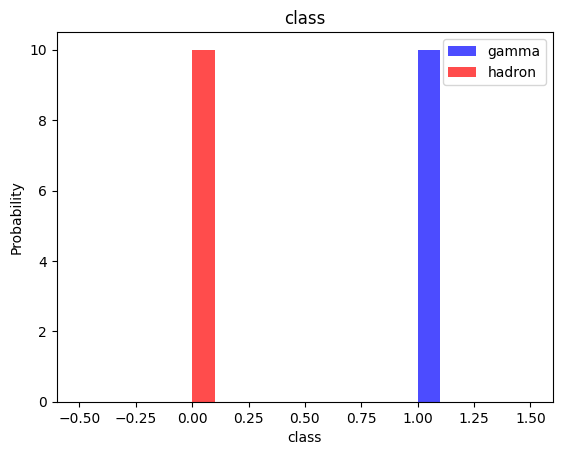

In [11]:
for label in df.columns:
  plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [12]:
df[['class','fWidth']]

class    fWidth
0          1   16.0021
1          1   11.7235
2          1  136.0310
3          1    9.5728
4          1   30.9205
...      ...       ...
19015      0   10.9170
19016      0    6.7020
19017      0   47.5305
19018      0   76.9018
19019      0   53.0014

[19020 rows x 2 columns]

#**TRAIN, VALIDATION AND TEST**

In [13]:
train, valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
#df.sample is used to randomize the data; then we split the data, 60 percent to train, 20 percent to validate and rest to test

In [14]:
train.shape

(11412, 11)

In [15]:
df.shape

(19020, 11)

***Scaling the features***

In [16]:
def scale_dataset(dataframe):
  #accepts dataframe
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  x=scaler.fit_transform(x)

  data=np.hstack((x,np.reshape(y,(len(y),1))))

  return data,x,y

In [17]:
len(train[train["class"]==1])#gamma

7394

In [18]:
len(train[train["class"]==0])#hadron

4018

As you can see the number of gamma are higher than the hadron, that can create a bias, so we have to oversample them.
So we import something from imblearn

In [19]:
#example of he scaling works...
t,x,y=scale_dataset(train)
t

array([[-0.47405435, -0.43396917, -0.56713586, ..., -0.75968736,
         0.07188883,  0.        ],
       [ 0.45223347, -0.53869606,  0.55790678, ...,  2.21304704,
         0.40282768,  0.        ],
       [ 1.16328524, -0.10842383,  0.9279029 , ..., -0.46010058,
         2.55723844,  0.        ],
       ...,
       [-0.17131012, -0.46743801, -0.23636569, ..., -0.93105199,
         0.29916688,  1.        ],
       [ 0.48019919,  0.08130924,  0.09800902, ..., -0.05895629,
         0.44460471,  0.        ],
       [ 0.21407564,  0.07351696,  0.67070789, ..., -0.9978921 ,
         1.56903856,  1.        ]])

In [20]:
def scale_dataset(dataframe,oversample=False):
  #accepts dataframe
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  x=scaler.fit_transform(x)
# using oversample only when its necessary
  if oversample:
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)  # take the less class and keep sampling from there to increase the size of the dataset for that smaller class


  data=np.hstack((x,np.reshape(y,(len(y),1))))

  return data,x,y

In [21]:
train, x_train,y_train=scale_dataset(train, oversample=True)
valid, x_valid,y_valid=scale_dataset(valid, oversample=False)
test, x_test,y_test=scale_dataset(test, oversample=False)


In [22]:
train

array([[-0.47405435, -0.43396917, -0.56713586, ..., -0.75968736,
         0.07188883,  0.        ],
       [ 0.45223347, -0.53869606,  0.55790678, ...,  2.21304704,
         0.40282768,  0.        ],
       [ 1.16328524, -0.10842383,  0.9279029 , ..., -0.46010058,
         2.55723844,  0.        ],
       ...,
       [-0.49375567, -0.29670003, -0.10702608, ..., -0.7603322 ,
         0.53291099,  0.        ],
       [ 1.28858821,  0.39409444,  1.03391898, ...,  0.07728407,
         0.50521085,  0.        ],
       [-0.61265367, -0.34145539, -0.28767748, ..., -0.71601905,
         0.81484046,  0.        ]])

# KNN : K- Nearest Neighbours
*Check out this link*   [IBM KNN](https://www.ibm.com/topics/knn#:~:text=Resources-,Next%20steps,of%20an%20individual%20data%20point.)

In [23]:
knn_model=KNeighborsClassifier(n_neighbors=1) #just taking one neighbor
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
y_pred=knn_model.predict(x_test)

In [25]:
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72      1307
           1       0.84      0.89      0.86      2497

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.82      0.81      3804



Accuracy : 82 percent, how many right to how many total

*   List item
*   List item


Precision : out of the positive labels, how many are true positives
recall: out of all negative labels we made, how many are true negatives


*   f1-score: combination of precision and recall
*   




In [27]:
knn_model=KNeighborsClassifier(n_neighbors=3) #just taking three neighbor
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
y_pred=knn_model.predict(x_test)

In [29]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1307
           1       0.86      0.84      0.85      2497

    accuracy                           0.80      3804
   macro avg       0.78      0.79      0.78      3804
weighted avg       0.81      0.80      0.80      3804



In [31]:
#we increased 0 at cost of 1. lets try 5

In [32]:
knn_model=KNeighborsClassifier(n_neighbors=5) #just taking three neighbor
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1307
           1       0.86      0.86      0.86      2497

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# [Naive Bayes](https://www.ibm.com/topics/naive-bayes#:~:text=The%20Na%C3%AFve%20Bayes%20classifier%20is,a%20given%20class%20or%20category.)
*Refer your psqt notes for logistic rebg and linear reg and naive bayes(nothing but bayes theorem*

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
nb_model=GaussianNB()

In [36]:
nb_model=nb_model.fit(x_train, y_train)

In [37]:
y_pred=nb_model.predict(x_test)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.40      0.50      1307
           1       0.74      0.89      0.81      2497

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



In [39]:
#scores just got worse

**Logistic Regression**
[Follow the link for a refresher](https://www.ibm.com/topics/logistic-regression#:~:text=Resources-,What%20is%20logistic%20regression%3F,given%20dataset%20of%20independent%20variables.)

In [40]:
from sklearn.linear_model import LogisticRegression

In [46]:
lg_model=LogisticRegression()
lg_model.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred=lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1307
           1       0.85      0.82      0.84      2497

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



In [48]:
#still knn is better

**Support Vector Machines**

```
#[scikit learn](https://scikit-learn.org/stable/modules/svm.html)
```


all the above four are classification models

In [49]:
from sklearn import svm
# from sklearn.svm import SVC

In [50]:
svm_model=svm.SVC()

In [51]:
svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1307
           1       0.90      0.91      0.90      2497

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



In [52]:
# provides the best stats

# Trying Neural Networks to get better stats
### Libraries include

*   TensorFlow
*   Keras



In [53]:
import tensorflow as tf


In [54]:
nn_model=tf.keras.Sequential([tf.keras.layers.Dense(32, activation='relu',input_shape=(10,)),
                              tf.keras.layers.Dense(32, activation='relu'),
                              tf.keras.layers.Dense(1,activation='sigmoid')])
#3 layer nn
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',metrics=['accuracy'])

In [76]:
history=nn_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2,verbose=0)

In [77]:
def plot_loss(history):
  fig, (ax1,ax2)=plt.subplots(1,2)
  ax1.plot(history.history['loss'], label='training loss')
  ax1.plot(history.history['val_loss'], label='testing loss')

  ax1.set_xlabel('epochs')
  ax1.set_ylabel('loss')
  ax2.plot(history.history['accuracy'], label='training accuracy')
  ax2.plot(history.history['val_accuracy'], label='testing accuracy')

  ax2.set_xlabel('epochs')
  ax2.set_ylabel('accuracy')
  plt.legend()
  plt.show()

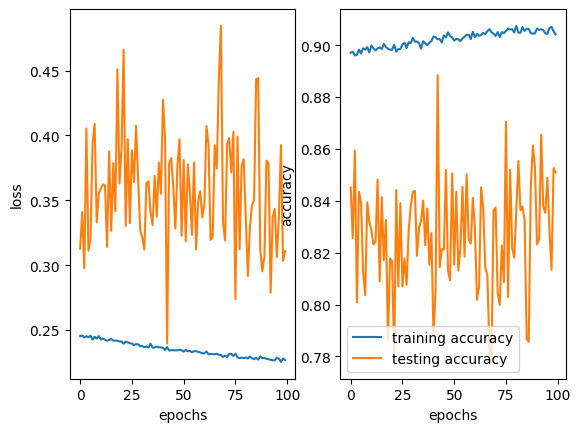

In [78]:
plot_loss(history)

In [79]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='training accuracy')
  plt.plot(history.history['val_accuracy'], label='testing accuracy')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend()

In [58]:
# we can see that accuracy is increasing and loss is decreasing

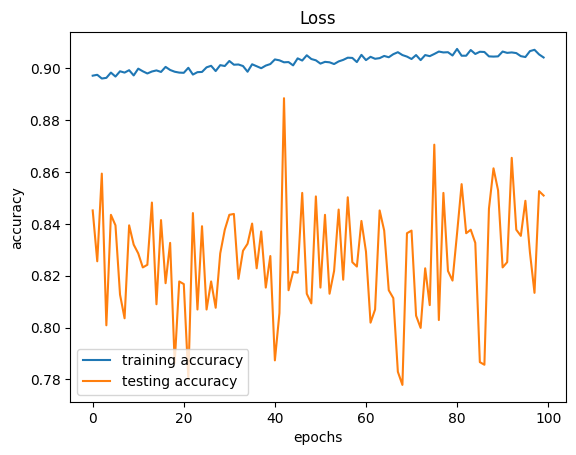

In [80]:
plot_accuracy(history)

We can change the parameters like 32 to any other number maybe, lets rewrite the code such that we can search through the etire spae and see what happens if we have different number of nodes. we can also change learning rates, batch size and epochs also drop out.

In [86]:
from tensorflow.python.ops.logging_ops import histogram_summary
def train_model(x_train, y_train, num_nodes, dropout_prob, lr,batch_size,epochs):
  nn_model=tf.keras.Sequential([tf.keras.layers.Dense(  num_nodes, activation='relu',input_shape=(10,)),
                                tf.keras.layers.Dropout(dropout_prob),
                                tf.keras.layers.Dense(num_nodes, activation='relu'),
                                tf.keras.layers.Dropout(dropout_prob),
                                tf.keras.layers.Dense(1,activation='sigmoid')])
  #3 layer nn
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',metrics=['accuracy'])
  history=nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2,verbose=0)
  return nn_model, history

16 nodes, 0 dropout, 0.01 learning rate, batch size32


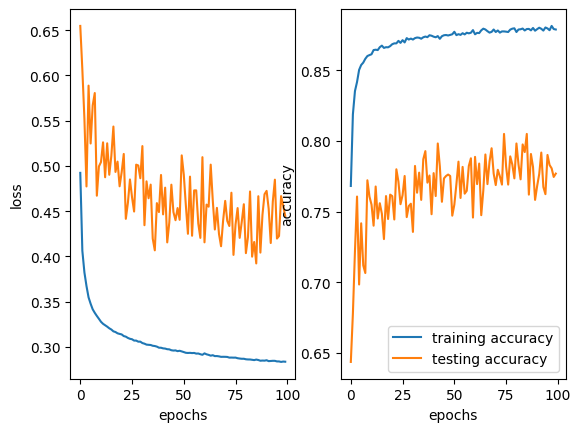

119/119 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8754
16 nodes, 0 dropout, 0.01 learning rate, batch size64


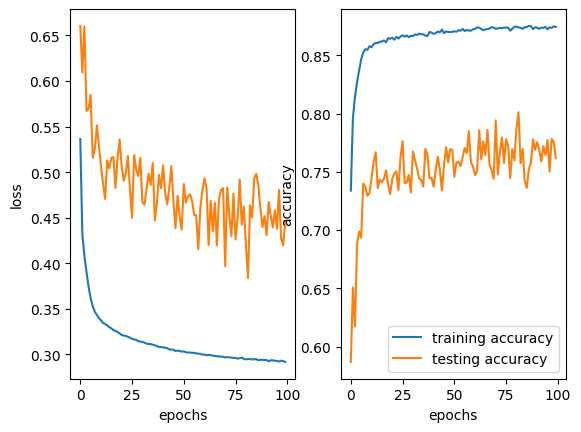

119/119 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.8743
16 nodes, 0 dropout, 0.01 learning rate, batch size128


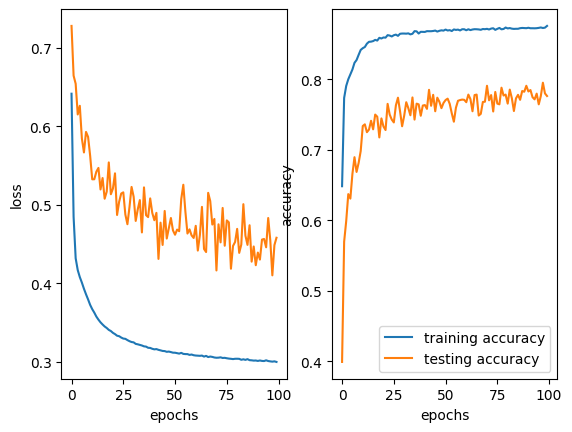

119/119 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8772
16 nodes, 0 dropout, 0.005 learning rate, batch size32


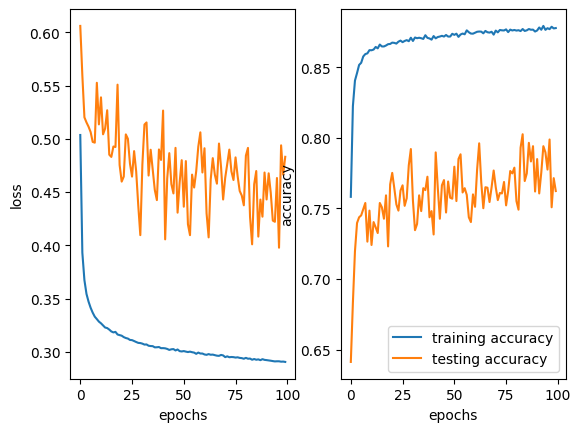

119/119 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.8788
16 nodes, 0 dropout, 0.005 learning rate, batch size64


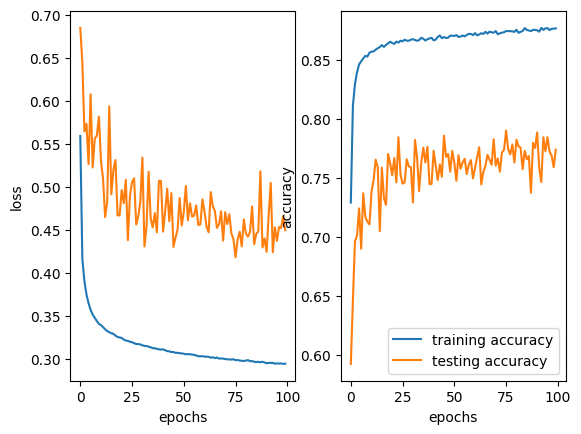

119/119 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8778
16 nodes, 0 dropout, 0.005 learning rate, batch size128


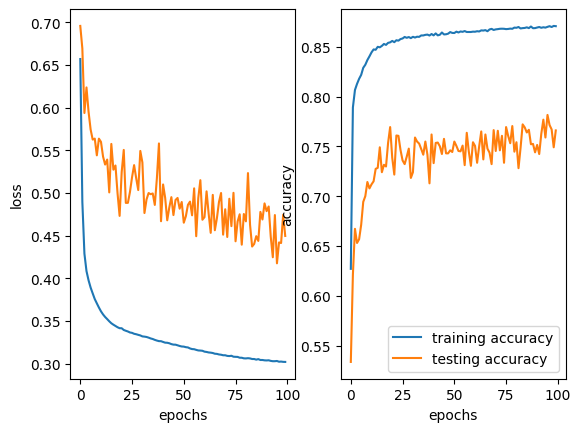

119/119 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8730
16 nodes, 0 dropout, 0.001 learning rate, batch size32


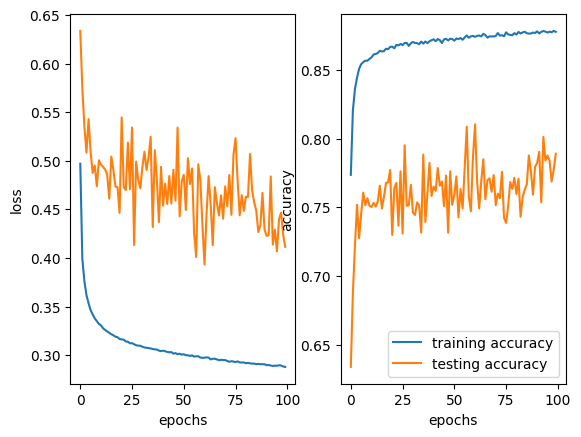

119/119 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.8762
16 nodes, 0 dropout, 0.001 learning rate, batch size64


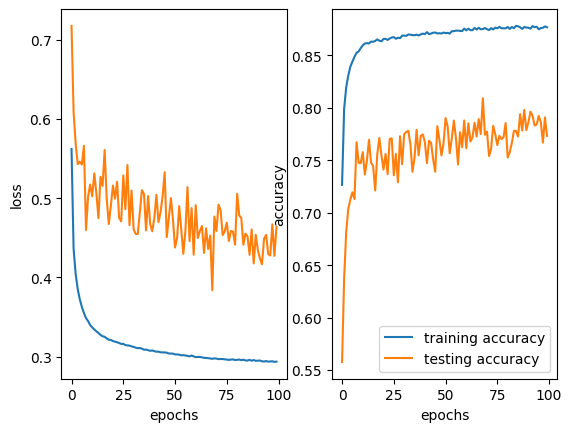

119/119 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8817
16 nodes, 0 dropout, 0.001 learning rate, batch size128


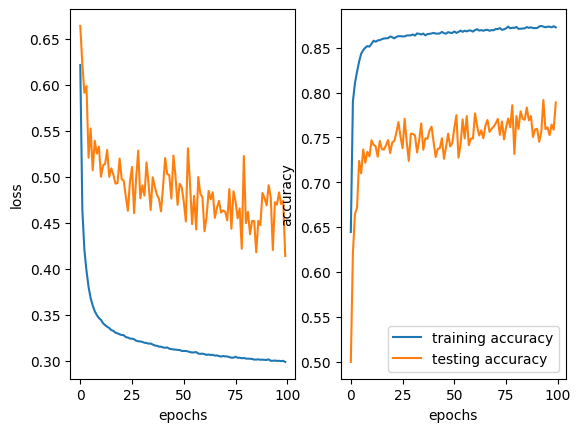

119/119 [==============================] - 0s 3ms/step - loss: 0.3114 - accuracy: 0.8693
16 nodes, 0.2 dropout, 0.01 learning rate, batch size32


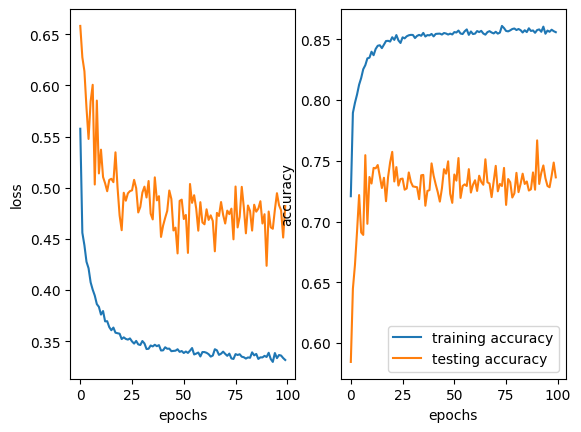

119/119 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8738
16 nodes, 0.2 dropout, 0.01 learning rate, batch size64


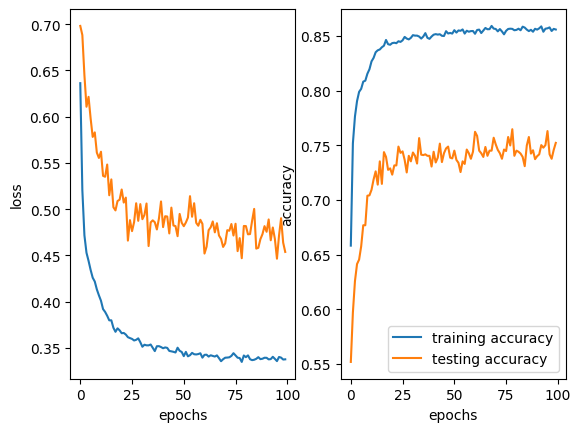

119/119 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8720
16 nodes, 0.2 dropout, 0.01 learning rate, batch size128


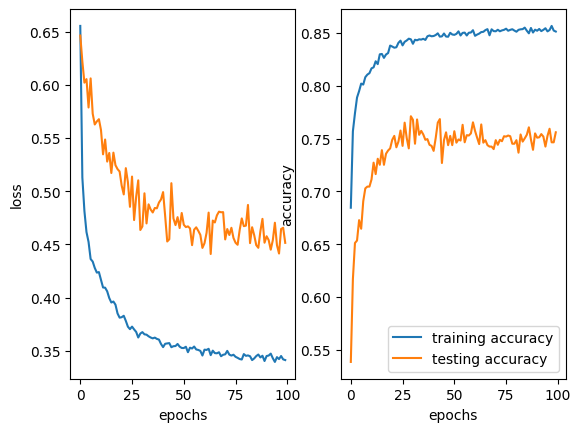

119/119 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8751
16 nodes, 0.2 dropout, 0.005 learning rate, batch size32


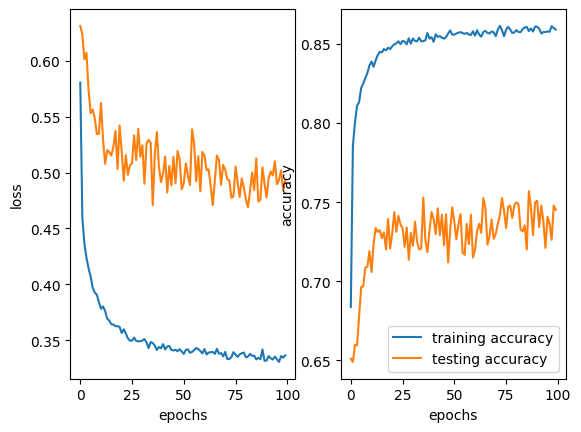

119/119 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8701
16 nodes, 0.2 dropout, 0.005 learning rate, batch size64


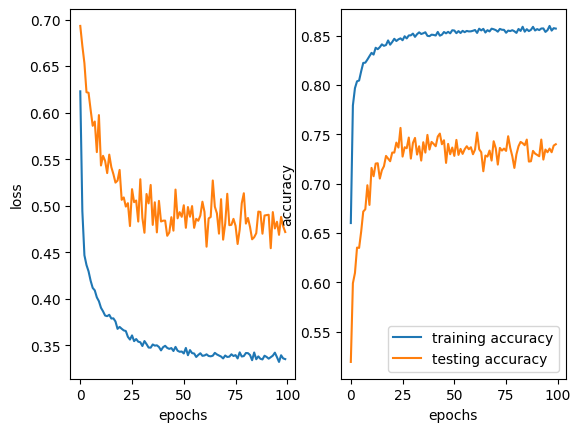

119/119 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8733
16 nodes, 0.2 dropout, 0.005 learning rate, batch size128


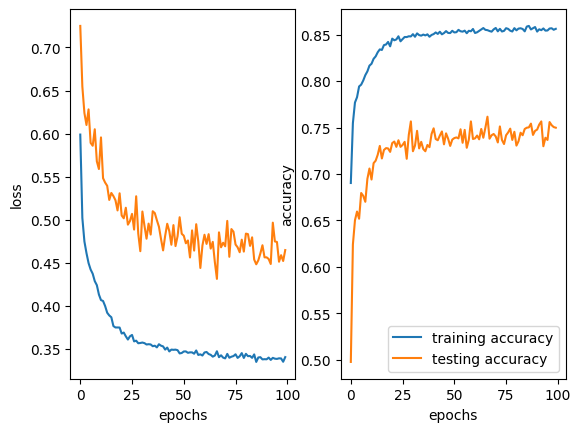

119/119 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8757
16 nodes, 0.2 dropout, 0.001 learning rate, batch size32


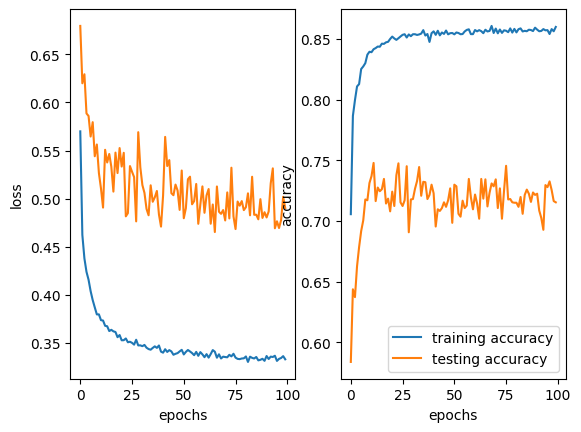

119/119 [==============================] - 0s 2ms/step - loss: 0.3118 - accuracy: 0.8715
16 nodes, 0.2 dropout, 0.001 learning rate, batch size64


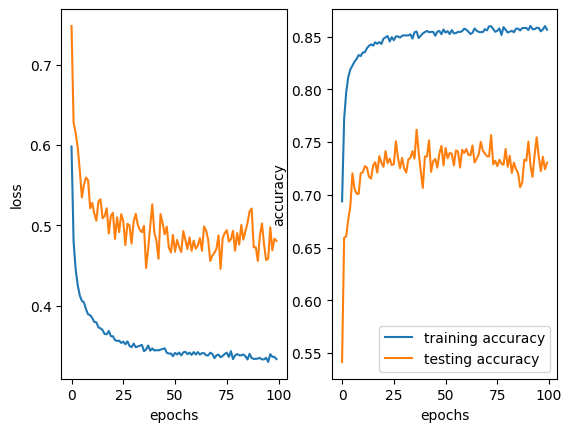

119/119 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8741
16 nodes, 0.2 dropout, 0.001 learning rate, batch size128


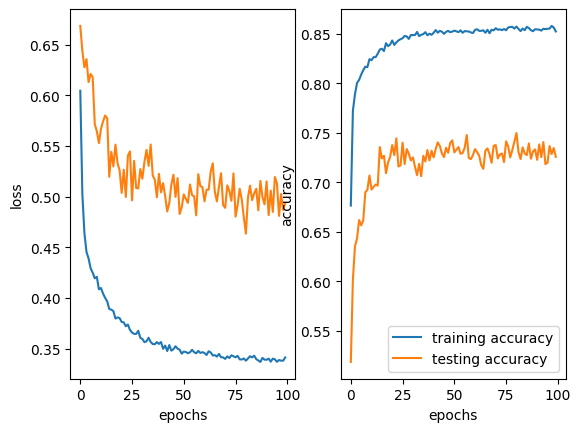

119/119 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8683
32 nodes, 0 dropout, 0.01 learning rate, batch size32


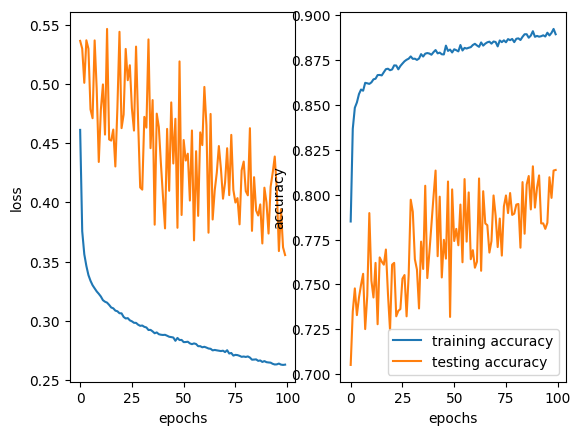

119/119 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8788
32 nodes, 0 dropout, 0.01 learning rate, batch size64


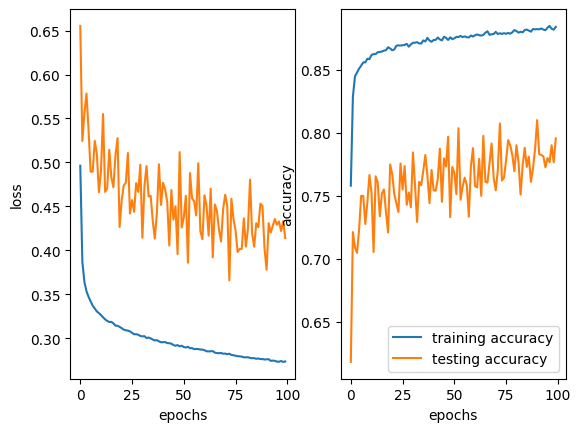

119/119 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.8778
32 nodes, 0 dropout, 0.01 learning rate, batch size128


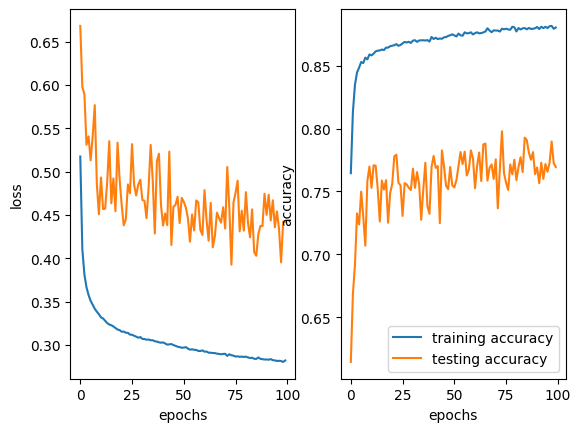

119/119 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8788
32 nodes, 0 dropout, 0.005 learning rate, batch size32


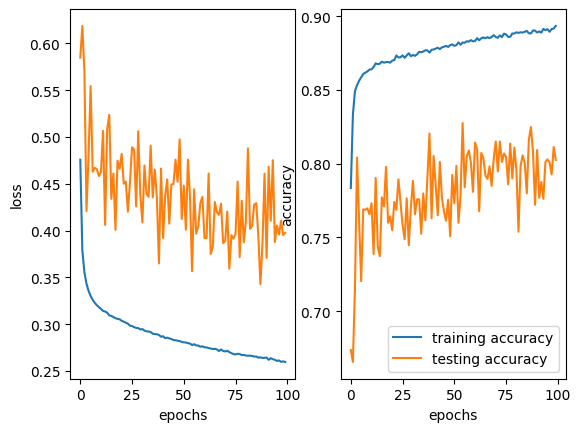

119/119 [==============================] - 0s 2ms/step - loss: 0.3096 - accuracy: 0.8764
32 nodes, 0 dropout, 0.005 learning rate, batch size64


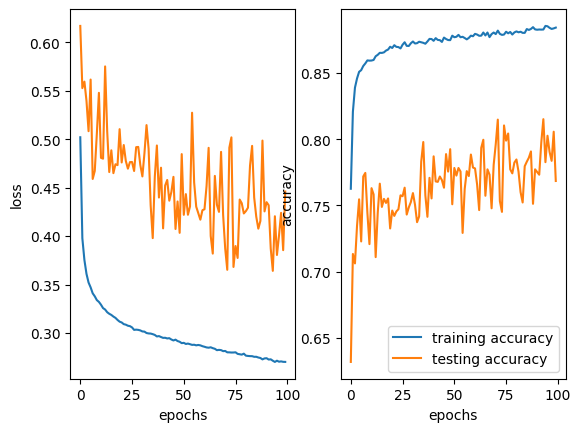

119/119 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8793
32 nodes, 0 dropout, 0.005 learning rate, batch size128


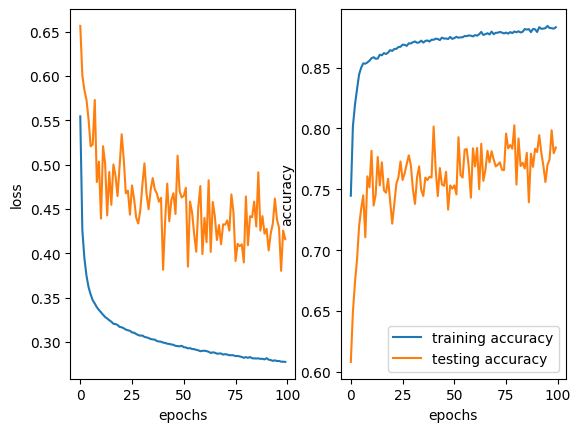

119/119 [==============================] - 0s 3ms/step - loss: 0.3035 - accuracy: 0.8743
32 nodes, 0 dropout, 0.001 learning rate, batch size32


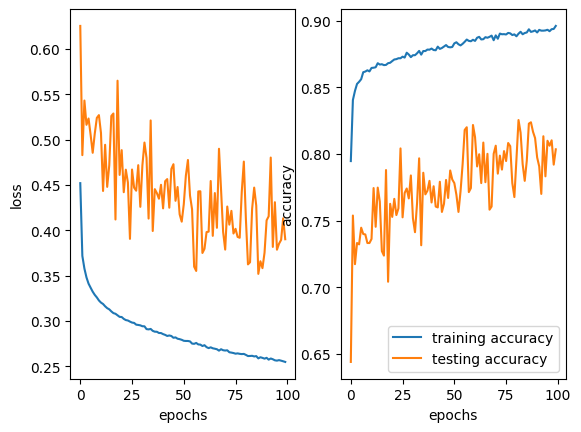

119/119 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.8780
32 nodes, 0 dropout, 0.001 learning rate, batch size64


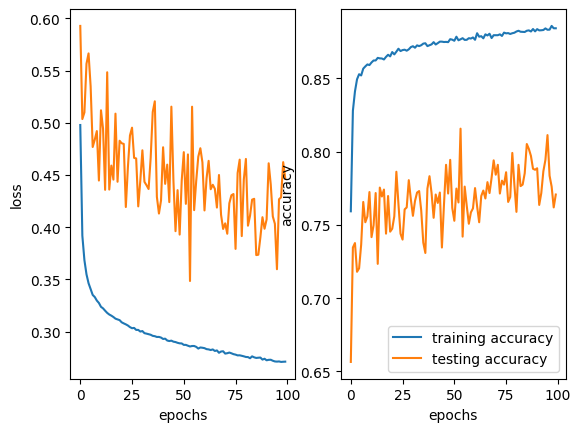

119/119 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8754
32 nodes, 0 dropout, 0.001 learning rate, batch size128


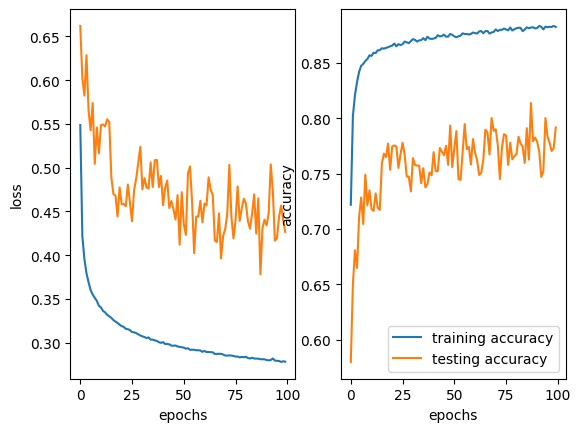

119/119 [==============================] - 0s 3ms/step - loss: 0.3062 - accuracy: 0.8778
32 nodes, 0.2 dropout, 0.01 learning rate, batch size32


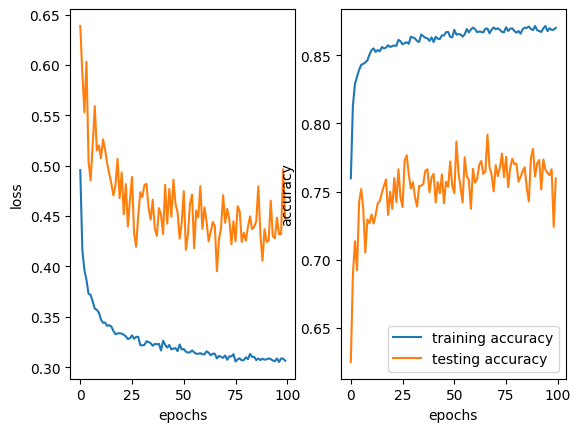

119/119 [==============================] - 0s 2ms/step - loss: 0.2997 - accuracy: 0.8780
32 nodes, 0.2 dropout, 0.01 learning rate, batch size64


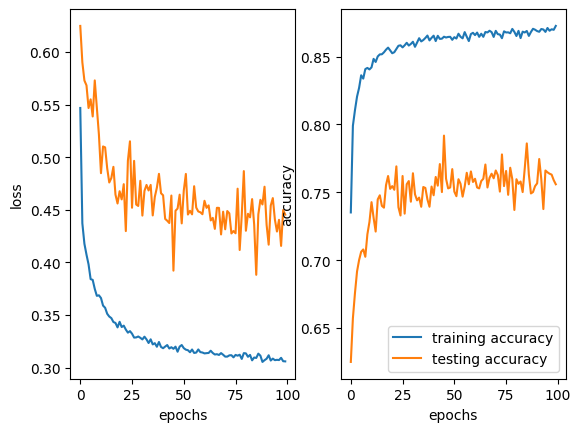

119/119 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8767
32 nodes, 0.2 dropout, 0.01 learning rate, batch size128


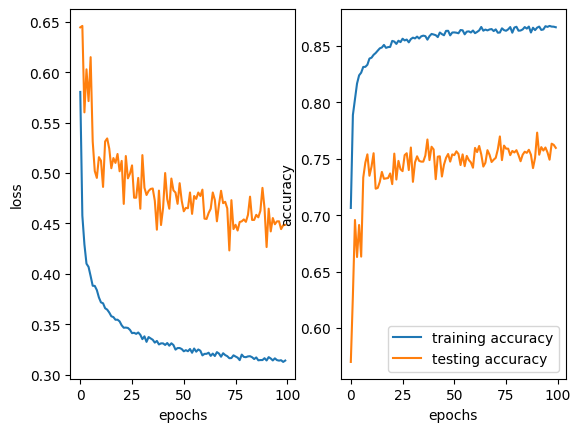

119/119 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.8778
32 nodes, 0.2 dropout, 0.005 learning rate, batch size32


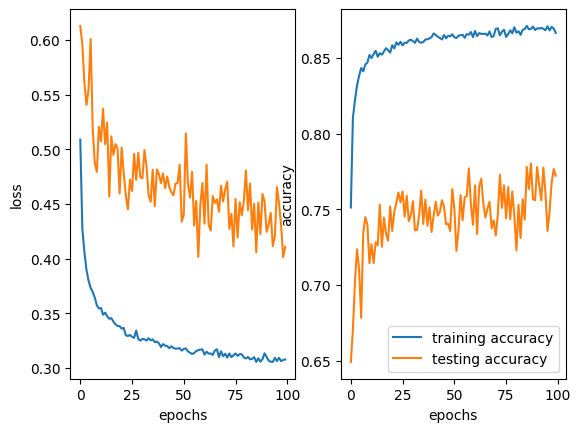

119/119 [==============================] - 0s 2ms/step - loss: 0.3025 - accuracy: 0.8767
32 nodes, 0.2 dropout, 0.005 learning rate, batch size64


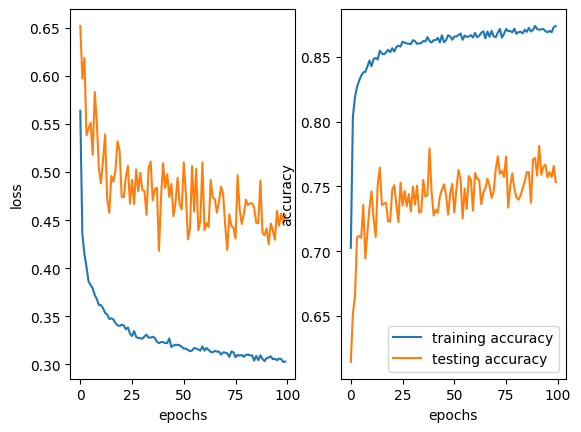

119/119 [==============================] - 0s 2ms/step - loss: 0.2968 - accuracy: 0.8793
32 nodes, 0.2 dropout, 0.005 learning rate, batch size128


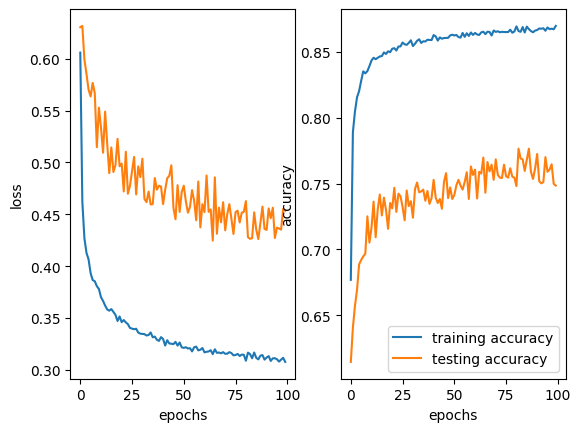

119/119 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8751
32 nodes, 0.2 dropout, 0.001 learning rate, batch size32


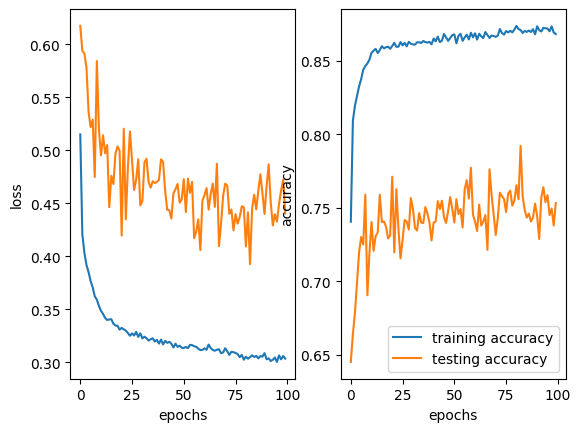

119/119 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.8783
32 nodes, 0.2 dropout, 0.001 learning rate, batch size64


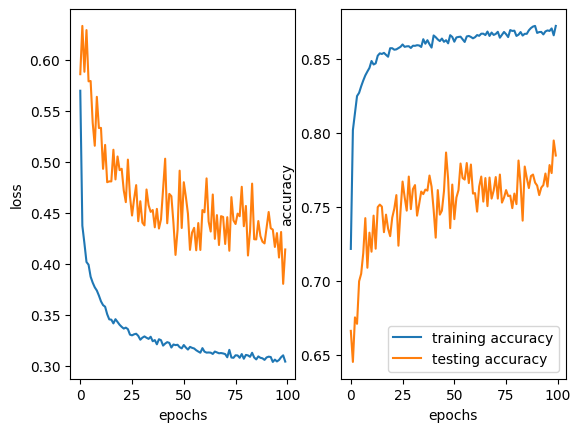

119/119 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.8778
32 nodes, 0.2 dropout, 0.001 learning rate, batch size128


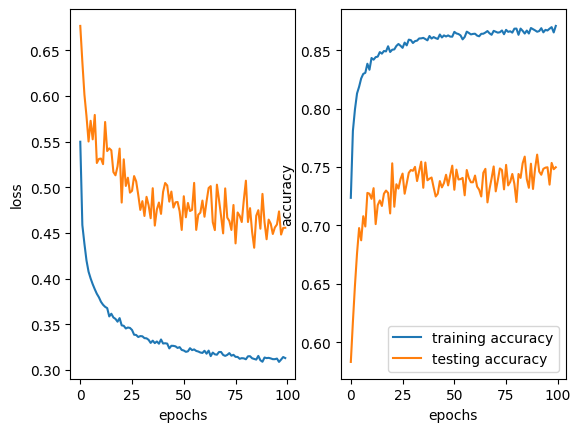

119/119 [==============================] - 0s 2ms/step - loss: 0.2989 - accuracy: 0.8780
64 nodes, 0 dropout, 0.01 learning rate, batch size32


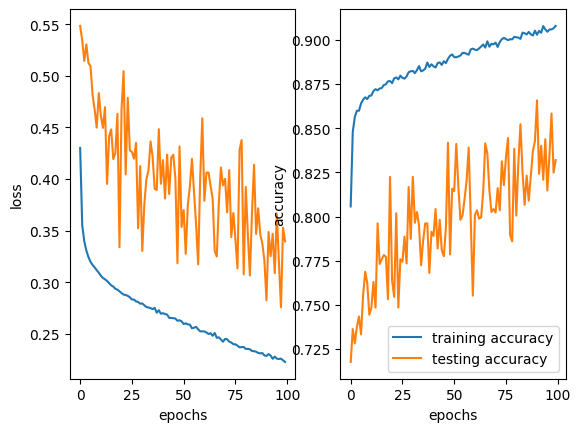

119/119 [==============================] - 0s 3ms/step - loss: 0.3271 - accuracy: 0.8775
64 nodes, 0 dropout, 0.01 learning rate, batch size64


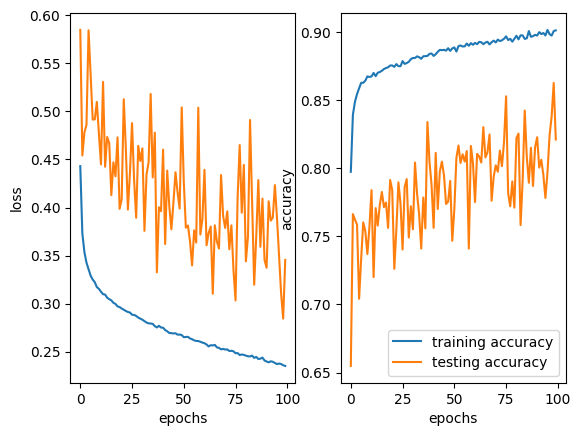

119/119 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.8770
64 nodes, 0 dropout, 0.01 learning rate, batch size128


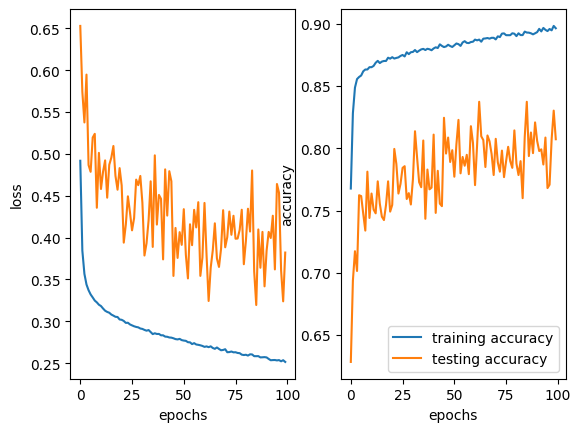

119/119 [==============================] - 0s 3ms/step - loss: 0.3037 - accuracy: 0.8822
64 nodes, 0 dropout, 0.005 learning rate, batch size32


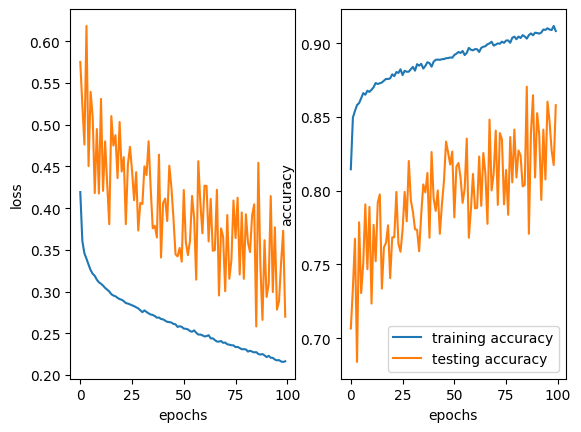

119/119 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.8707
64 nodes, 0 dropout, 0.005 learning rate, batch size64


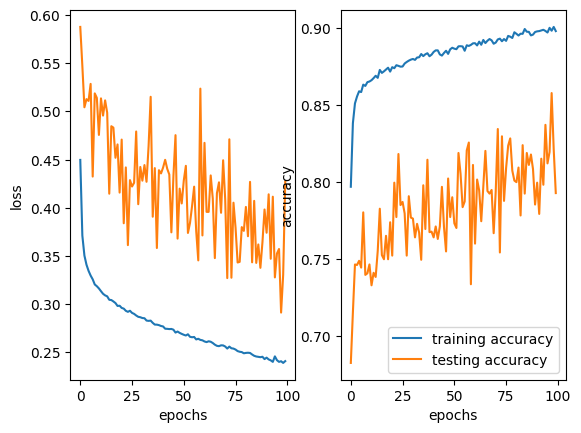

119/119 [==============================] - 0s 3ms/step - loss: 0.3269 - accuracy: 0.8712
64 nodes, 0 dropout, 0.005 learning rate, batch size128


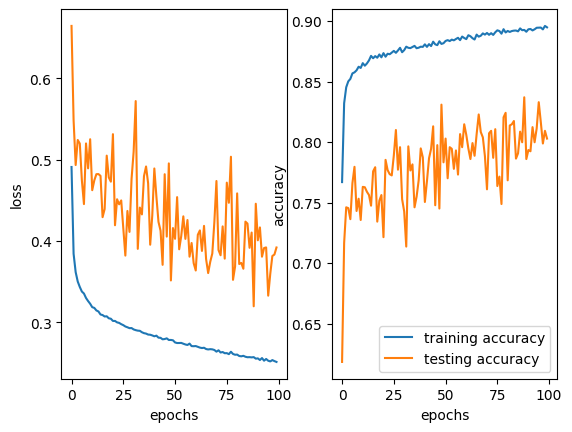

119/119 [==============================] - 0s 2ms/step - loss: 0.3037 - accuracy: 0.8804
64 nodes, 0 dropout, 0.001 learning rate, batch size32


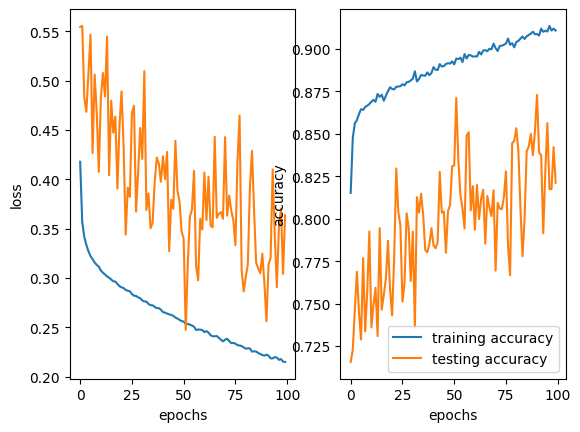

119/119 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8707
64 nodes, 0 dropout, 0.001 learning rate, batch size64


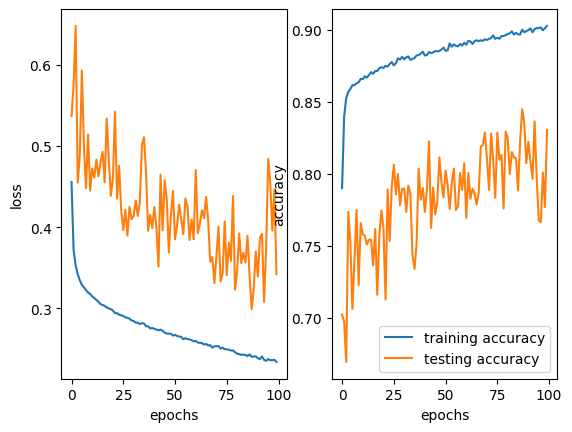

119/119 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8767
64 nodes, 0 dropout, 0.001 learning rate, batch size128


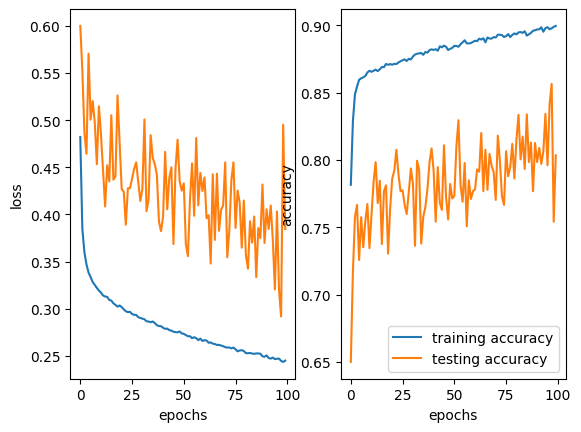

119/119 [==============================] - 0s 2ms/step - loss: 0.3070 - accuracy: 0.8793
64 nodes, 0.2 dropout, 0.01 learning rate, batch size32


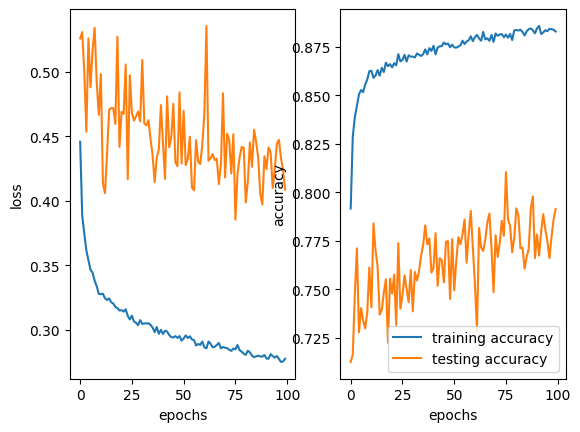

119/119 [==============================] - 0s 2ms/step - loss: 0.2899 - accuracy: 0.8812
64 nodes, 0.2 dropout, 0.01 learning rate, batch size64


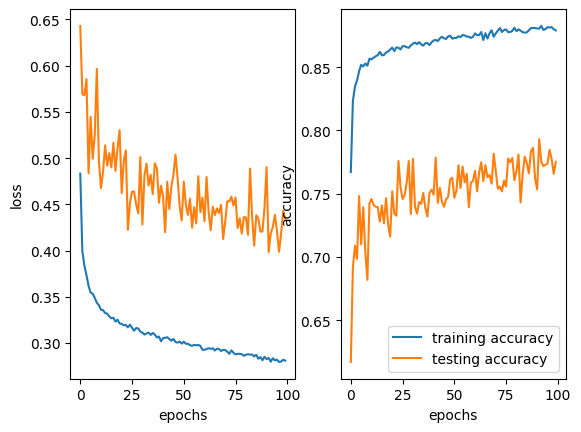

119/119 [==============================] - 0s 3ms/step - loss: 0.2933 - accuracy: 0.8849
64 nodes, 0.2 dropout, 0.01 learning rate, batch size128


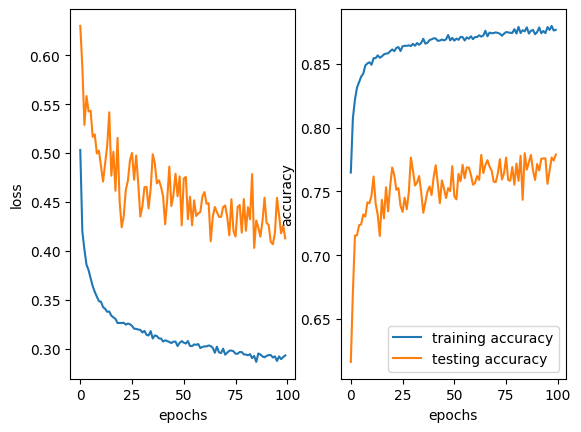

119/119 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.8843
64 nodes, 0.2 dropout, 0.005 learning rate, batch size32


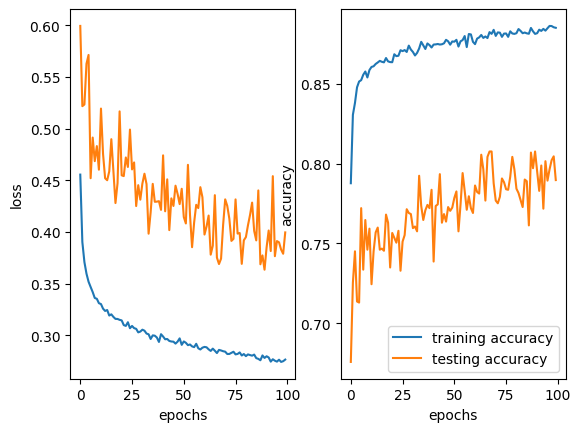

119/119 [==============================] - 0s 2ms/step - loss: 0.2959 - accuracy: 0.8788
64 nodes, 0.2 dropout, 0.005 learning rate, batch size64


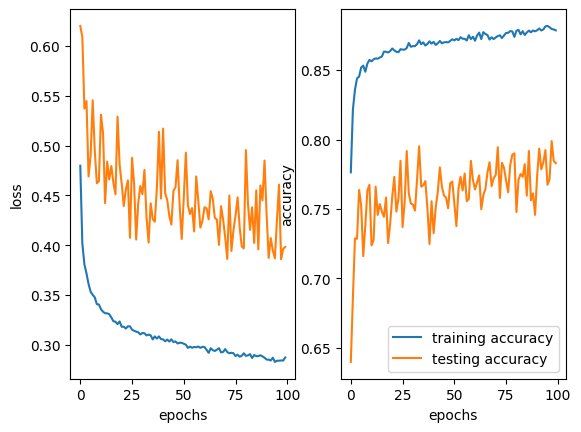

119/119 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.8817
64 nodes, 0.2 dropout, 0.005 learning rate, batch size128


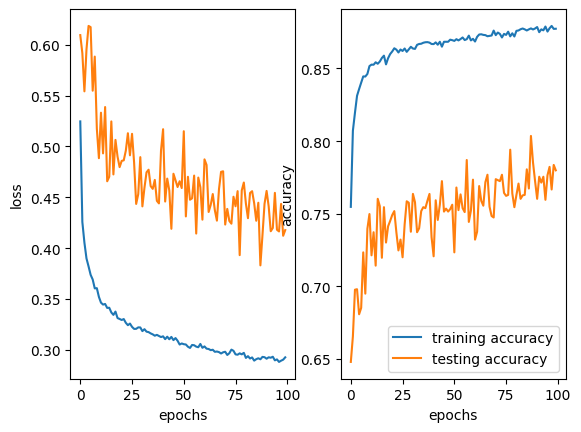

119/119 [==============================] - 0s 2ms/step - loss: 0.2964 - accuracy: 0.8799
64 nodes, 0.2 dropout, 0.001 learning rate, batch size32


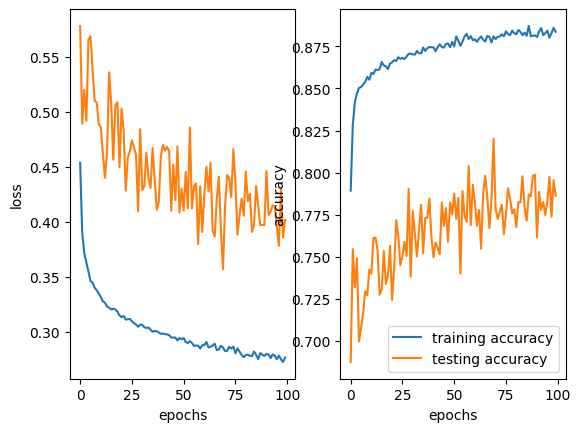

119/119 [==============================] - 0s 2ms/step - loss: 0.2924 - accuracy: 0.8841
64 nodes, 0.2 dropout, 0.001 learning rate, batch size64


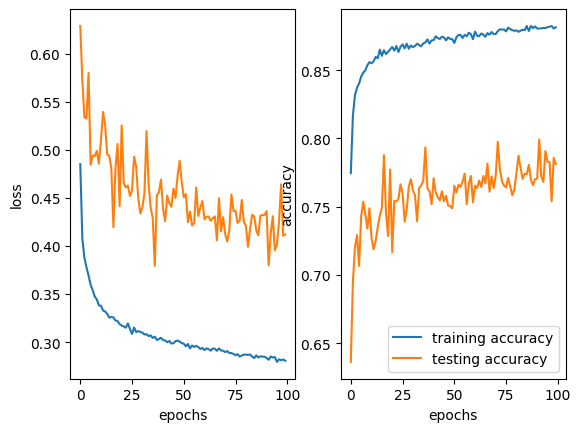

119/119 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.8817
64 nodes, 0.2 dropout, 0.001 learning rate, batch size128


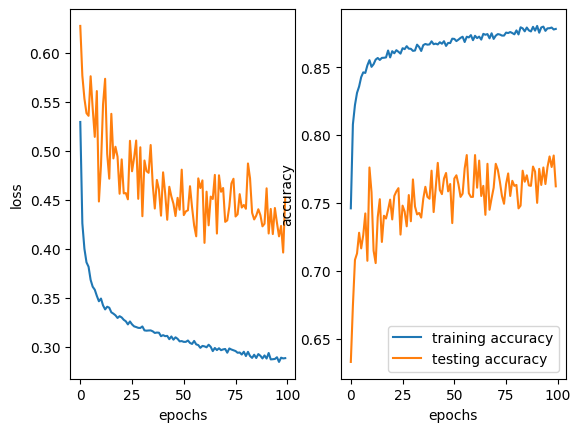

119/119 [==============================] - 0s 2ms/step - loss: 0.2958 - accuracy: 0.8828


In [90]:
least_val_loss=[float('inf'),float('inf')]
least_loss_model=None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes, {dropout_prob} dropout, {lr} learning rate, batch size{batch_size}")
        model, history=train_model(x_train,y_train,num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_loss(history)
        val_loss=model.evaluate(x_valid, y_valid)
        if val_loss< least_val_loss:
          least_val_loss=val_loss
          least_loss_model=model

In [91]:
least_loss_model.predict(x_test)

119/119 [==============================] - 0s 2ms/step


array([[0.9992281 ],
       [0.690062  ],
       [0.03377204],
       ...,
       [0.972156  ],
       [0.9499738 ],
       [0.8973018 ]], dtype=float32)

In [93]:
y_pred=least_loss_model.predict(x_test)
y_pred=(y_pred>0.5).astype(int).reshape(-1,)
y_pred

119/119 [==============================] - 0s 2ms/step


array([1, 1, 0, ..., 1, 1, 1])

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1307
           1       0.88      0.95      0.91      2497

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804



In [96]:
# Accuracy shot to 90 percent but almost similar to svm model. Sometimes simple model is better and appropriate

### Thus we conclude the Magic Telescope model!